# Tensors
Tensors are the main type of variable we'll be dealing with in PyTorch. But wait! What is a tensor?

As far as we're concerned, a tensor is a data-type that looks just like an array, but has been optimized for computation on the GPU. If you're already familiar with numpy.array from Python or Matlab matrices, then tensors look just like these structures. However, they have two important additional functionalities:
- under the hood, computation on them can be run on either the CPU or GPU without you needing to any additional work.
- they support building "computational graphs" and performing "auto differentiation" -- concepts we'll cover in this lecture.

Complete documentation: https://pytorch.org/docs/stable/tensors.html

## Imports we'll need:

In [15]:
# PyTorch library
import torch

# Numpy -- the defacto numerical computation library for Python. CPU computation only
import numpy as np

# Matplotlib -- an excellent tool for visualizations
import matplotlib.pyplot as plt
%matplotlib inline
# print("NumPy version:", np.__version__)
# print("PyTorch version:", torch.__version__)

### Defining our first Tensor

In [16]:
# Here is a standard python list we'll use to create a pytorch tensor:
python_standard_list = [1.0, 2.0]
a = torch.tensor(python_standard_list)

# we can define a tensor using python list as:
print(a)
print(a.shape)
print(a.size())
print(type(a))
print(a.dtype)

a_mat = torch.tensor([[1.0, 2.0], [2.0, 1.0]])
print(a_mat)
print(a_mat.shape)
print(a_mat.dtype)

tensor([1., 2.])
torch.Size([2])
torch.Size([2])
<class 'torch.Tensor'>
torch.float32
tensor([[1., 2.],
        [2., 1.]])
torch.Size([2, 2])
torch.float32


**Important observations**:

1. the `.shape` property and `.size()` method both return a tuple of the tensor dimensions. The first replicates the numpy approach and the second is native to pytorch. Feel free to use either.
2. the `type()` function tells us that the variable is an object instance of the torch.Tensor class. Everything in python is an object. Even variables are objects.
3. `torch.float32` and `torch.float` are equivalent. `float` is accurate up to 7 decimal points and occupies 32 bits of memory. We'll come back to this idea and why it matters after seeing the next example.

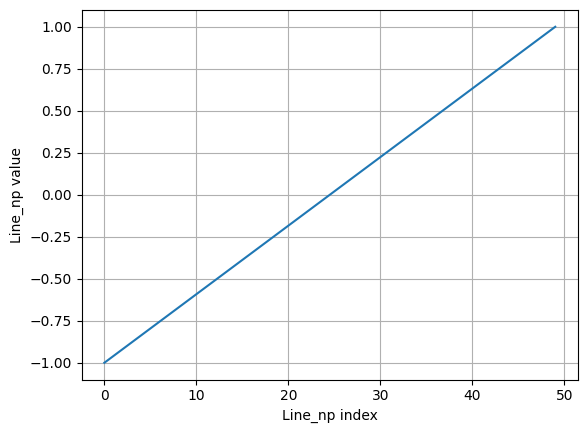

<class 'torch.Tensor'>
torch.float64


In [17]:
# we can also convert numpy arrays into torch tensors
line_np = np.linspace(-1, 1, 50)

plt.plot(line_np)
plt.xlabel("Line_np index")
plt.ylabel("Line_np value")
plt.grid()
plt.show()

line_tt = torch.from_numpy(line_np)
print(type(line_tt))
print(line_tt.dtype)

Note in the above example that once converted to a torch tensor, the data type is `torch.float64`, whereas when we created the torch tensor by passing a python List, the resulting torch tensor was of the type `torch.float32`. You need to be careful as later when we're building models, all tensors need to be of the same data type. We prefer to use `torch.float64` which is the *same* as `torch.double` data types for the vast majority of applications. This level of precision is a nice balance between computational speed and memory consumption. In rare cases, you may use float16 for better memory consumption at the cost of precision. Be warned that gradient computations do benefit a lot from numerical precision so stick to the `float64`/`double` as much as possible.

*optional*: why does this happen? `torch.tensor` and `torch.from_numpy()` are both data type aware. They convert to tensors using the data type of the original object passed to them. By default, a native python List as we defined it is a list of `float` values which are converted to `float32` (the standard float representation). The numpy array is by default in `double` precision which is the same as `float64` (because it is designed for high precision computation). You can test this out by trying out `print(type(1.0))` and `print(np.array([1., 2.]).dtype)`.

Here's how we specify the dtype that we want:

In [18]:
# lets define a tensor with a specific data type of torch.double
line_tt32 = torch.tensor(line_np, dtype=torch.double)
print(line_tt32.dtype)

torch.float64


### Basic algebraic operations on tensors

Full documentation here: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

All primitive tensor operations `(+, -, *, /)` are element-wise:

In [19]:
a = torch.tensor([1.0, 2.0])
b = torch.tensor([4.0, -1.0])

# lets cycle through the basic operators
print(a+b)
print(a-b)
print(a*b)
print(a/b)

tensor([5., 1.])
tensor([-3.,  3.])
tensor([ 4., -2.])
tensor([ 0.2500, -2.0000])


There's one important operator, @, which performs 2 roles. It is either a dot product (inner product) when we give it two vectors (1D arrays/tensors), or a matrix multiplication when passed 2D or larger arrays:

In [20]:
# note that for 1d arrays @ performs a dot product, for 2D arrays, it performs a matrix multiplication, see next example
print(a@b)


tensor(2.)


Let's see how things work with 2D tensors.

In [21]:
c = torch.tensor([[2.0, 1.0], [-1.0, 3.0]])
d = torch.ones(2,2)

print(c)
print(d)

tensor([[ 2.,  1.],
        [-1.,  3.]])
tensor([[1., 1.],
        [1., 1.]])


In [22]:
print(c + d)
print(c - d)
print(c * d)
print(c / d)
print(c @ d) # note that for 1d arrays @ performs a dot product, for 2D arrays, it performs a matrix multiplication

tensor([[3., 2.],
        [0., 4.]])
tensor([[ 1.,  0.],
        [-2.,  2.]])
tensor([[ 2.,  1.],
        [-1.,  3.]])
tensor([[ 2.,  1.],
        [-1.,  3.]])
tensor([[3., 3.],
        [2., 2.]])


## Functions

Now that you've learned the basics of tensors, let's try writing some functions:

In [23]:
# our custom sine function in pytorch:
def my_sin(x):
    return torch.sin(x)

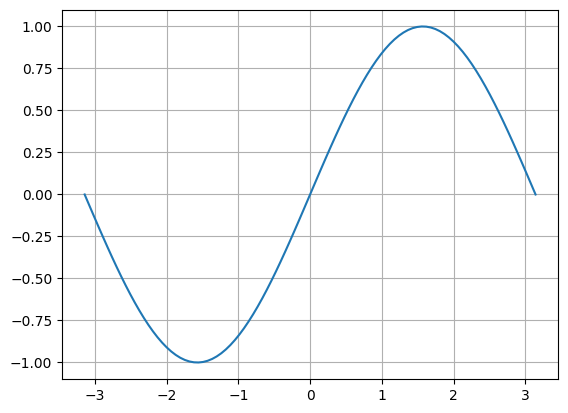

In [24]:
# lets plot our custom sine function for a visual test:

x_axis = np.linspace(-np.pi, np.pi, 100)
sin_input = torch.from_numpy(x_axis)

sin_output = my_sin(sin_input)

# .numpy() to make tensor plotable, .detach() to get raw data
sin_output_numpy = sin_output.detach().cpu().numpy()
#make sure to do tensor.detach().cpu().numpy() to get a numpy array you can plot in matplotlib

plt.plot(x_axis, sin_output_numpy)
plt.grid()
plt.show()

In [25]:
# lets define a custom bell curve!
def my_bell_curve(x):
    square_x = torch.square(x)
    # exp(-x^2)
    x_exp = torch.exp(-square_x)
    return x_exp

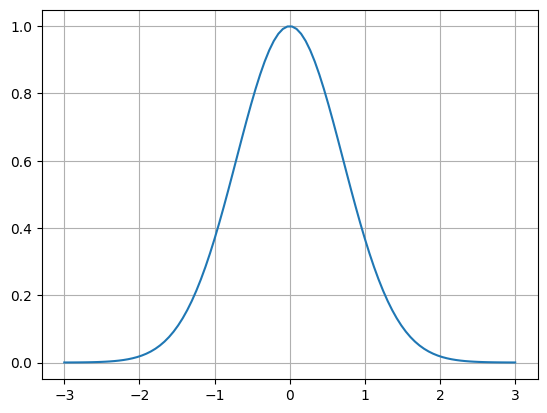

In [26]:
x_axis = torch.linspace(-3, 3, 100)
y_values = my_bell_curve(x_axis)

plt.plot(x_axis.detach().cpu().numpy(), y_values.detach().cpu().numpy())
plt.grid()
plt.show()

In the context of this course, we can think of functions as a sequence of tensor operations.

### Computation Graphs

Last lecture, you learned about computation graphs -- a powerful tool to build a dynamic process for executing calculations. In pytorch, we build computational graphs by sequencing tensor operations. Here is a short example that demonstrates how to build a computational graph in pytorch:

In [27]:
# Create tensors for our computational graph
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
c = torch.tensor(3.0, requires_grad=True)

# Create a computational graph
d = a * b + c

# Calculate the gradients with respect to the tensors
d.backward()

# Print the gradients
print(a.grad)
print(b.grad)
print(c.grad)

tensor(1.)
tensor(2.)
tensor(1.)


In this example, we create three tensors a, b, and c and set `requires_grad` to `True` to tell pytorch that we want to compute gradients with respect to these tensors. Then, we create a computational graph by performing the operation `d = a * b + c`. Finally, we use the `backward` method to compute the gradients and print the results. This method uses the concept of *automatic differentiation* which you learned in the previous lecture to compute these gradients. Gradients describe how the output changes with respect to the input and we'll use them for optimization. The result shows that the gradient of `d` with respect to `a` is 1, the gradient with respect to `b` is 2, and the gradient with respect to `c` is 1.

Let's see another 2 examples:

In [28]:
# lets first zero gradients so we can recompute them. Everytime you recompute gradients, you need to first zero them!
a.grad.zero_()
b.grad.zero_()
f_a = a ** 2 - 1
f_a.backward()
print(a.grad)

# Since we're going to re-use a and b in a new function, we're going to zero their gradients again:
a.grad.zero_()
b.grad.zero_()

print('++++ g_xy example +++')
g_xy = a ** 2 + b ** 2 - 1
g_xy.backward()
print(a.grad)
print(b.grad)

# as an excercise, you can try not zeroing your gradients and seeing how the outputs will change!

tensor(4.)
++++ g_xy example +++
tensor(4.)
tensor(2.)


### Fitting a line using automatic differentiation:

In the previous lecture, we learned how to fit a line with a linear model using gradient descent. Here, we'll show an example implemented with pytorch:

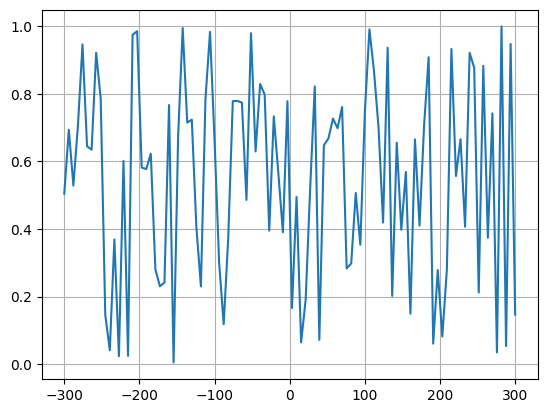

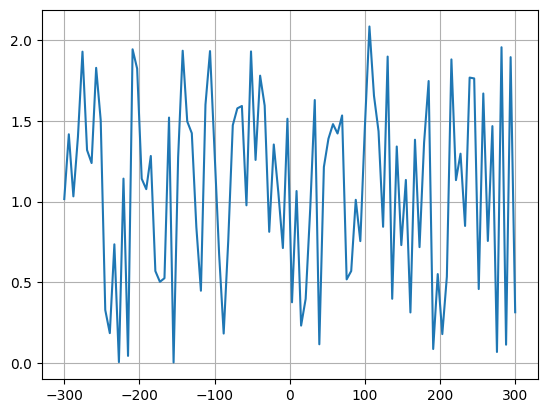

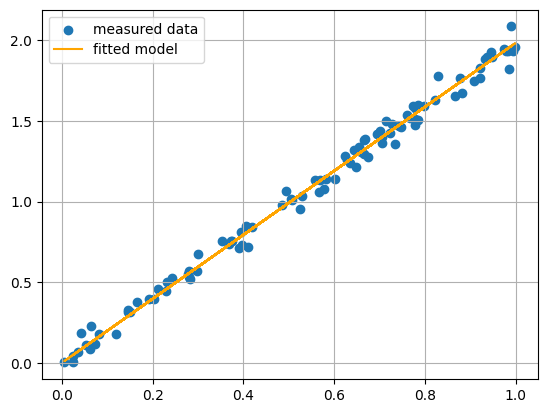

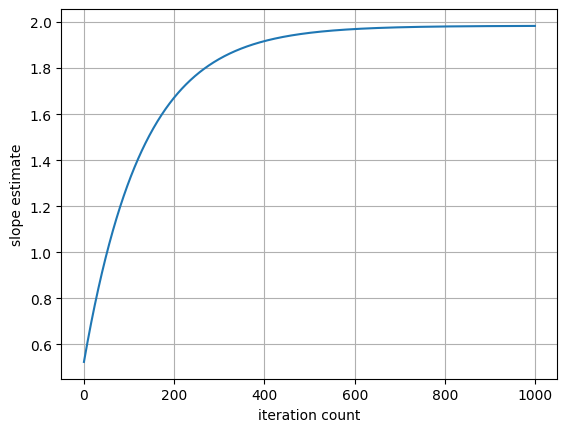

In [29]:
dtype = torch.FloatTensor
lr = 0.01                           # learning rate
num_iterations = 1000


# generating our synthetic data
num_data = 100
# generate #num_data random datas
x = torch.rand(num_data)                   # input tensor

x_axis = torch.linspace(-300, 300, 100)
plt.plot(x_axis.detach().cpu().numpy(), x.detach().cpu().numpy())
plt.grid()
plt.show()
# "randn" indicates random normal distrbution
y = 2 * x + torch.randn(num_data) * 0.05   # output tensor + noise

plt.plot(x_axis.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.grid()
plt.show()

# guess an initial value for our slope -- this choice is random!
slope_estimate = torch.randn(1, requires_grad=True, dtype=torch.float)
# print(slope_estimate)

# this variable will maintain a history of our slope estimate
slope_estimate_history = torch.zeros(num_iterations, 1)

def my_linear_model(x, a):
    y_estimate = a * x
    return y_estimate

# fitting loop next!
for i in range(num_iterations):
    # run our data through our model -- build computation graph
    y_est = my_linear_model(x, slope_estimate)

    # compute my loss:
    mse_loss = torch.square(y-y_est).mean()
    #compute my gradients with respect to the loss and slope
    mse_loss.backward()

    with torch.no_grad(): # pytorch does not allow in place operations with tensors with gradients
        slope_estimate -= lr * slope_estimate.grad

    slope_estimate.grad.zero_()
    slope_estimate_history[i] = slope_estimate

plt.scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy(), label='measured data')
plt.plot(x.detach().cpu().numpy(), (slope_estimate * x).detach().cpu().numpy(), c='orange', label='fitted model')
plt.legend()
plt.grid()
plt.show()

plt.plot(slope_estimate_history.detach().cpu().numpy())
plt.grid()
plt.ylabel('slope estimate')
plt.xlabel('iteration count')
plt.show()

Solution x: tensor([1.0000, 1.0000], dtype=torch.float64, requires_grad=True)


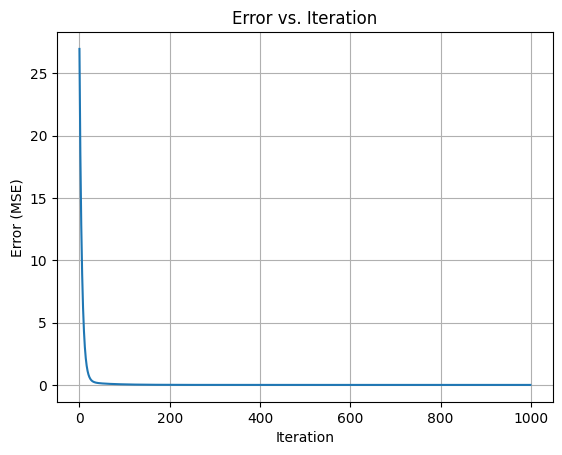

In [34]:
# now let's generalize that to solve any Ax=b problem

def solve_Ax_b(A, b, learning_rate=0.01, num_iterations=1000):
    """
    Solves the linear equation Ax = b using gradient descent.

    Args:
        A: A 2D torch tensor representing the matrix A.
        b: A 1D torch tensor representing the vector b.
        learning_rate: The learning rate for gradient descent.
        num_iterations: The number of iterations to perform.

    Returns:
        A tuple containing:
            - x: The solution vector x.
            - loss_history: A list of the errors at each iteration.
    """

    #check if A is a square matrix
    if A.shape[0] != A.shape[1]:
      raise ValueError("A must be a square matrix")

    #check dimensions of A and b
    if A.shape[0] != b.shape[0]:
      raise ValueError("Dimensions of A and b are incompatible")

    # Initialize x with random values
    x = torch.randn(A.shape[1], requires_grad=True, dtype=torch.float64)

    loss_history = []

    for _ in range(num_iterations):

        # Calculate the Mean Squared Error (MSE) loss
        mse = torch.square(b - A @ x).mean()

        # Compute gradients
        mse.backward()

        # Update x using gradient descent
        with torch.no_grad():
            x -= x.grad * learning_rate #replace this line

        # Zero gradients for the next iteration
        x.grad.zero_()

        #append loss to history
        loss_history.append(mse.item())

    return x, loss_history


# Example usage
A = torch.tensor([[2.0, 1.0], [1.0, 2.0]], dtype=torch.float64)
b = torch.tensor([3.0, 3.0], dtype=torch.float64)

x_out, loss_history = solve_Ax_b(A, b)


print("Solution x:", x_out)

# Plot the error
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Error (MSE)")
plt.title("Error vs. Iteration")
plt.grid(True)
plt.show()

Linear models are limited, we'd like to fit neural networks that are complex non-linear models. The power of autograd is that it is able to compute gradients of these much more complex models without additional work from us. All we need to worry about is defining our models correctly. In the next example, we'll perform the same task, but with a more complex model.

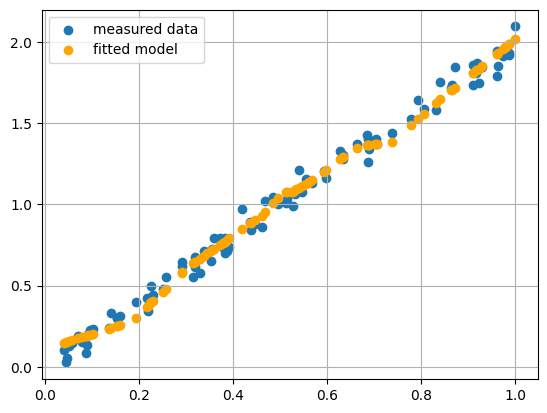

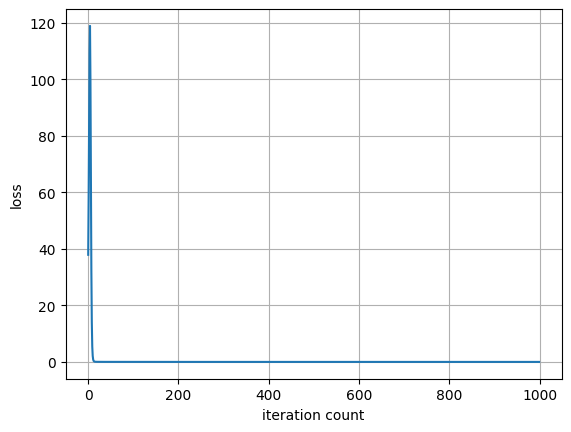

In [32]:
dtype = torch.FloatTensor
l2 = 1e-3
num_iterations = 1000
# H:hiden layers
D_in, H, D_out = 1, 100, 1
# weights and bias
w1 = torch.randn(H, D_in, requires_grad=True, dtype=torch.float)
w2 = torch.randn(D_out, H, requires_grad=True, dtype=torch.float)
b1 = torch.randn(H, 1, requires_grad=True, dtype=torch.float)
b2 = torch.randn(1, requires_grad=True, dtype=torch.float)

loss_history = torch.zeros(num_iterations, 1)

def simple_neural_network(x, w1_net, w2_net, bias1, bias2):
    # apply a linear transformation
    z =  w1_net @ x.unsqueeze(dim=0) + bias1

    # custom ReLU activation
    z_relu = torch.max(torch.zeros(z.shape), z)

    # apply another linear transformation
    y_e = w2_net @ z_relu + bias2
    return y_e

for i in range(num_iterations):
    y_est = simple_neural_network(x, w1, w2, b1, b2)

    mse_loss = torch.square(y - y_est).mean()
    mse_loss.backward()

    with torch.no_grad(): # pytorch does not allow in place replacement for a tensor with requires_grad = True so we need this
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        b1 -= lr * b1.grad
        b2 -= lr * b2.grad

    w1.grad.zero_()
    w2.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()
    loss_history[i] = mse_loss

plt.scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy(), label='measured data')
plt.scatter(x.detach().cpu().numpy(), simple_neural_network(x, w1, w2, b1, b2).detach().cpu().numpy(), c='orange', label='fitted model')
plt.legend()
plt.grid()
plt.show()

plt.plot(loss_history.detach().cpu().numpy())

plt.grid()
plt.ylabel('loss')
plt.xlabel('iteration count')
plt.show()


#### Are functions enough?

While functions are effective tools for composing tensor operations, they are not so effective for building models. The reason is that we need a state/memory to hold the parameters of a model. Functions don't do this. We also don't want to use global variables because of the danger of altering them by accident. Further, building models using functions is quite low-level and can be challenging for buildig large scale models. Most ML models are composed of layers with learnable weights. We would benefit from a more high-level and abstract way of defining models.

So, what is the alternative? We use the nn.Module from pytorch and build models using classes inhereting from this base class. The example/description below will show you how to do this.

### Building models with the nn.Module

The `nn.Module` is the base class that provides an extremely useful and powerful set of functionalities we'll use to create models. Objects, instances of this class, allow us to create and maintain a state/memory -- we use this functionality for initializing, storing, and updating model parameters. This class takes care of the details for us! In the previous section, we had to define and initialize the parameters, as well as all the book keeping to update them. This class does that automatically. The nn.Module also deploys automatic differentiation without the need from you do any extra work. All we need to do is define the structure of the model and the rest is taken care of.

**optional**: In addition, using classes that inherit from the nn.Module base class allows us to do fancy things such as defining our own custom methods to propagate gradients through our models and allow us to build complicated models with just a few lines of code. We'll see this later on in the course.

Let's take the manually defined neural network example from the previous section and redo it with nn.Module.

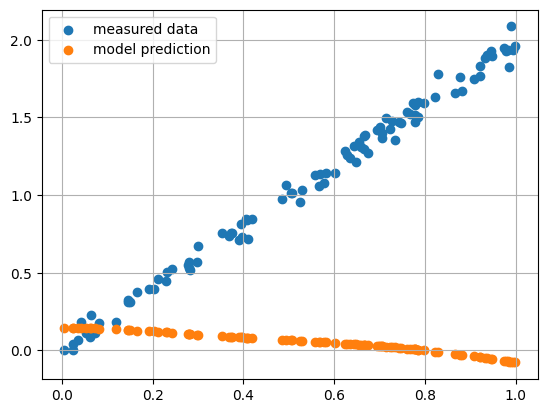

In [43]:
# parent class: torch.nn.Module
class SimpleNeuralNetwork(torch.nn.Module):
    def __init__(self, D_in=1, H=100, D_out=1):
        super().__init__()
        # layer definitions go here
        self.linear1 = torch.nn.Linear(D_in, H)
        self.act1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        # forward pass goes here
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        return x

# we're going to create a model and just see how it works!
model_simple_nn = SimpleNeuralNetwork()
model_simple_nn.eval() #This is really important! Switches the model to Evaluation Mode (default is Training Mode)
                       #Don't evaluate a model unless it is in Evaluation Mode!

y_pred = model_simple_nn(x.unsqueeze(dim=1))

plt.scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy(), label='measured data')
plt.scatter(x.detach().cpu().numpy(), y_pred.detach().cpu().numpy(), label='model prediction')
plt.legend()
plt.grid()
plt.show()

Currently, the model is not doing anything, that's because we have not done any sort of training. Rather than the manual setup we put together in the previous example, we can use the `torch.optim` class to define an optimizer that will handle the parameter update for us!

In [34]:
model_simple_nn.train() # lets put the model in training mode, you can't train in evaluation mode

optimizer = torch.optim.SGD(model_simple_nn.parameters(), lr=1e-2)
# that's it!

Now lets setup a training loop and run it:

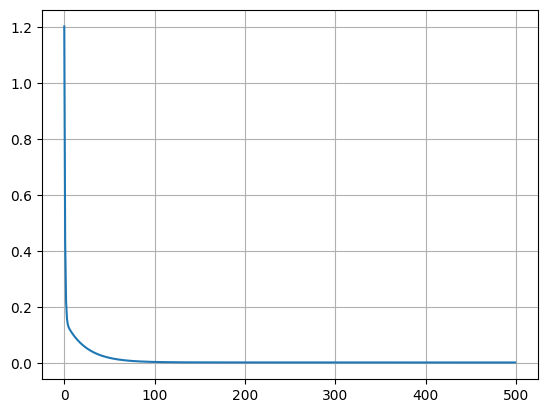

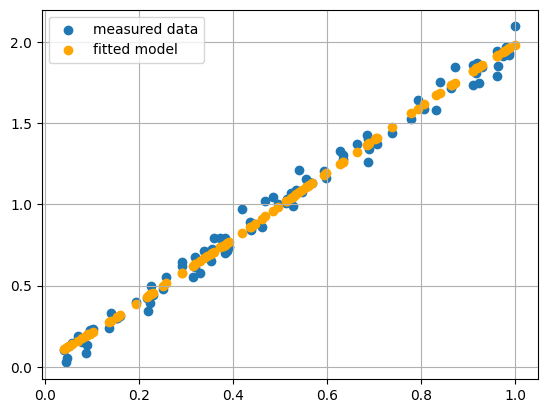

In [35]:
num_iterations = 500
loss_hist = torch.zeros((num_iterations, 1)) # keep track of the loss over iterations


for i in range(num_iterations):
    yhat = model_simple_nn(x.unsqueeze(dim=1))

    # first lets zero our gradients
    optimizer.zero_grad() # make sure to do this! otherwise gradients accumulate

    # now we compute our loss
    mse_loss = torch.square(y-yhat.squeeze(dim=1)).mean()

    # compute the gradients with respect to our loss
    mse_loss.backward()

    # update our parameters using the optimizer!
    optimizer.step()

    # No more manual update!
    # with torch.no_grad():
    #     w1 -= lr * w1.grad
    #     w2 -= lr * w2.grad
    #     b1 -= lr * b1.grad
    #     b2 -= lr * b2.grad

    # No more telling PyTorch to let gradients go!
    # w1.grad.zero_()
    # w2.grad.zero_()
    # b1.grad.zero_()
    # b2.grad.zero_()

    loss_hist[i] = mse_loss


plt.plot(loss_hist.detach().cpu().numpy())
plt.grid()
plt.show()

model_simple_nn.eval()
plt.scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy(), label='measured data')
plt.scatter(x.detach().cpu().numpy(), model_simple_nn(x.unsqueeze(dim=1)).detach().cpu().numpy(), c='orange', label='fitted model')
plt.legend()
plt.grid()
plt.show()

Now that we've done the linear model, lets try the more complicated quadratic data-set:

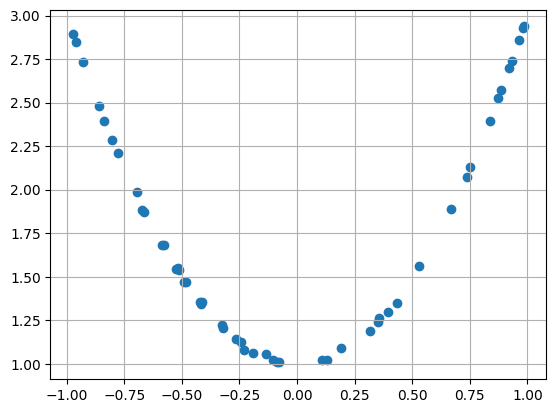

In [36]:
# generate some random data
x = torch.rand(50) * 2 - 1
y = 2 * x ** 2 + 1 + torch.randn(50) * 0.01

plt.scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.grid()
plt.show()

We'll use the same model and training procedure:

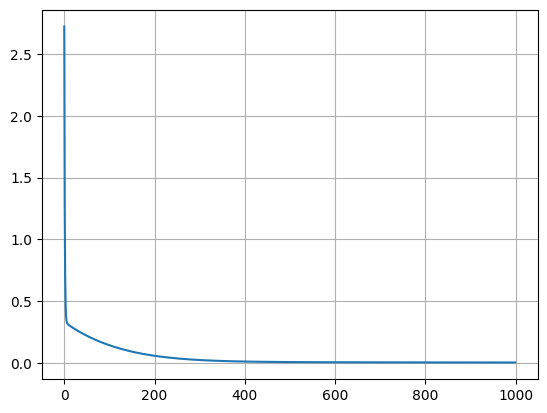

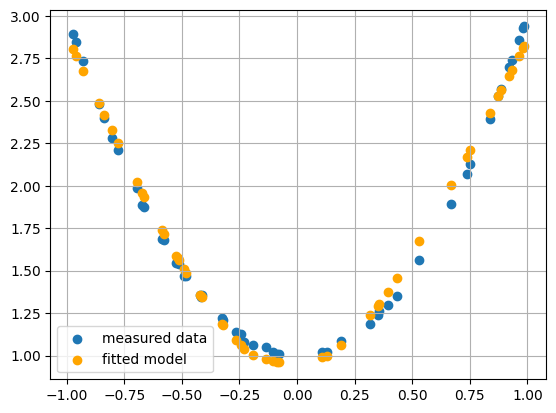

In [37]:
model = SimpleNeuralNetwork()
model.train()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

num_iterations = 1000
loss_hist = torch.zeros((num_iterations, 1))

for i in range(num_iterations):
    yhat = model(x.unsqueeze(dim=1))

    # first lets zero our gradients
    optimizer.zero_grad()

    # now we compute our loss
    mse_loss = torch.square(y-yhat.squeeze(dim=1)).mean()

    # compute the gradients with respect to our loss
    mse_loss.backward()

    # update our parameters using the optimizer!
    optimizer.step()

    loss_hist[i] = mse_loss


plt.plot(loss_hist.detach().cpu().numpy())
plt.grid()
plt.show()

model.eval()
plt.scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy(), label='measured data')
plt.scatter(x.detach().cpu().numpy(), model(x.unsqueeze(dim=1)).detach().cpu().numpy(), c='orange', label='fitted model')
plt.legend()
plt.grid()
plt.show()

As you see, without any additional change, the neural network was able to do a very nice job of fitting the data.

In [38]:
#if you'd like to see the parameters of the model, you can do
#print(list(model.parameters()))


Now try implementing your own network. Start from the template code below and see if you can train a model to fit the data. Try to make the final loss as low as possible. You can try playing with the number of layers, the size of the layers, and the number of iterations.

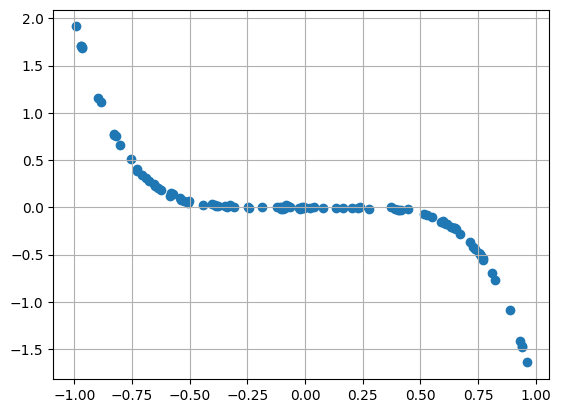

In [39]:
# generate some random data
x = torch.rand(100) * 2 - 1
y = -2 * x ** 5 + torch.randn(100) * 0.01

plt.scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.grid()
plt.show()

Final Loss:  [0.49583694]


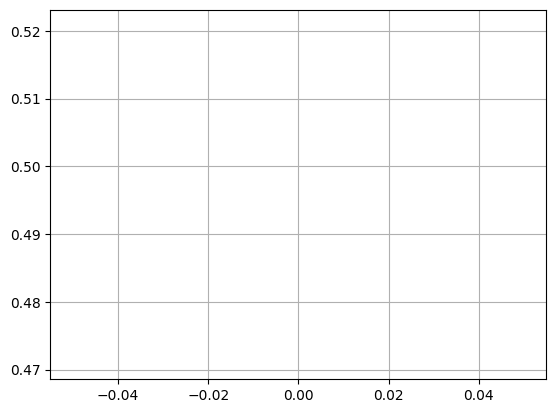

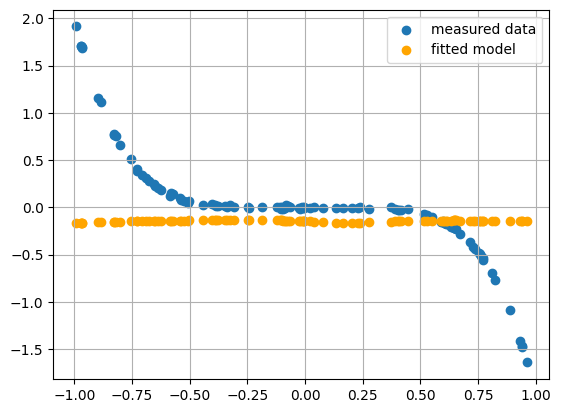

In [40]:
class MyNeuralNetwork(torch.nn.Module):
    #H sets the size of the hidden layer(s)
    #you can try using different sizes for different hidden layers
    def __init__(self, D_in=1, H=100, D_out=1):
        super().__init__()
        # layer definitions go here
        # previous model was:
        self.linear1 = torch.nn.Linear(D_in, H)
        self.act1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        # forward pass goes here
        # previous model was:
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)

        return x

model = MyNeuralNetwork()
model.train() #put the model in training mode
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) #create the optimizer

num_iterations = 1 #make sure to set a reasonable number of iterations
loss_hist = torch.zeros((num_iterations, 1))

for i in range(num_iterations):
    #do a forward pass to get yhat
    yhat = model(x.unsqueeze(dim=1))

    # zero our gradients
    optimizer.zero_grad()

    # now we compute our loss
    mse_loss = torch.square(y-yhat.squeeze(dim=1)).mean()

    # compute the gradients with respect to our loss
    mse_loss.backward()

    # update our parameters using the optimizer!
    optimizer.step()

    loss_hist[i] = mse_loss

print('Final Loss: ', loss_hist[-1].detach().cpu().numpy())
plt.plot(loss_hist.detach().cpu().numpy())
plt.grid()
plt.show()

model.eval()
plt.scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy(), label='measured data')
plt.scatter(x.detach().cpu().numpy(), model(x.unsqueeze(dim=1)).detach().cpu().numpy(), c='orange', label='fitted model')
plt.legend()
plt.grid()
plt.show()